In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':1,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Alternatives'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [2]:
quote = Quote(symbols, 70, 20)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-04-26 to 2019-07-05 - 12'

In [3]:
stat = quote.statistics()
stat = stat[(stat['drawdown'] < 8) & (stat['shrp'] > 0.4)]
print(len(stat))
stat

,len,mean,std,shrp,drawdown
Symbols,,,,,
XLRE,29,2.813783,1.594930,1.664683,4.835459
ICF,29,2.257556,1.490411,1.408219,4.991450
IYR,29,1.997493,1.517838,1.211435,4.963136
VNQ,29,2.008512,1.528578,1.210132,5.135487
REET,29,1.525438,1.144766,1.193875,3.361345
RWX,29,1.287706,1.026157,1.100198,1.910171
USRT,29,1.525715,1.345486,1.015979,5.198662
RWO,29,1.275036,1.165848,0.957506,3.132428
RWR,29,1.300685,1.399457,0.815998,4.950217


Populating the interactive namespace from numpy and matplotlib
evicted IYR 0.9947758757769156
evicted VNQ 0.967214568899166
evicted RWR 0.9981322627083624
evicted SCHH 0.9845157819140861
evicted RWO 0.9766777982301883
evicted USRT 0.9216914445630843
evicted VNQI 0.8942284713296308
evicted REET 0.7946328659458997
evicted ICF 0.9579731373302933
{'RWX': 0.43, 'XLRE': 0.57}


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,29.0,2.159371,1.105720,-0.271306,1.425655,2.329392,2.943558,4.148555,1.809355,3.120099
XLRE,29.0,2.813783,1.594930,-0.222032,1.873858,2.807312,3.731914,5.464639,1.664683,4.835459
RWX,29.0,1.287706,1.026157,-0.517056,0.699294,1.113123,2.125973,3.396912,1.100198,1.910171


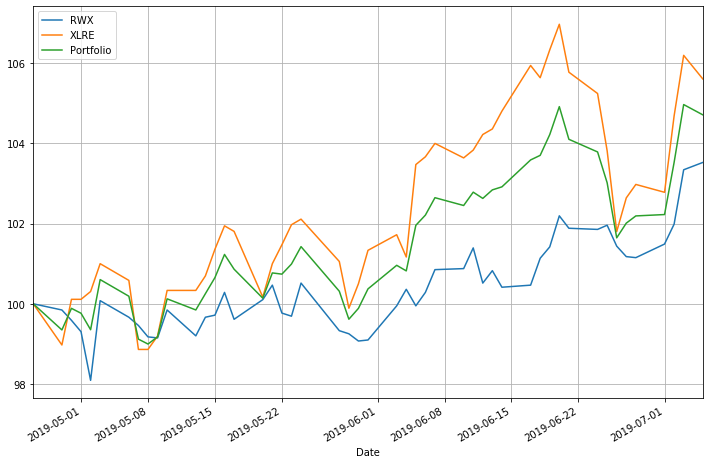

In [4]:
%pylab inline
quote.drop_mask()
ratio = quote.optimize_portfolio(stat.index)
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)